In [14]:
import pandas as pd
import numpy as np

In [15]:
data =pd.read_csv('cardio_uncleaned.csv')


y_value_counts= data['cardio'].value_counts()
print(y_value_counts)

print(data.shape)

0    35021
1    34979
Name: cardio, dtype: int64
(70000, 13)


DATA CLEANING

In [16]:
# delete the rows wich have ap_hi value less 60
data.drop(data[data['ap_hi']<60].index,axis=0,inplace=True)

# delete the rows which have ap_hi value high 240
data.drop(data[data['ap_hi']>240].index,axis=0,inplace=True)

# delete the rows that have ap_lo value high then 180
data.drop(data[data['ap_lo']>180].index,axis=0,inplace=True)

# delete the rows that have ap_low va;ue less then 40
data.drop(data[data['ap_lo']<40].index,axis=0,inplace=True)

#delete the rows that have weight less then 50kg
data.drop(data[data['weight']<50].index,axis=0,inplace=True)

#delete the row that have height less then 120cm 
data.drop(data[data['height']<120].index,axis=0,inplace=True)

In [17]:
# replace gender 1 to female and 2 to Male

data['gender'] = data['gender'].replace(1,'female')
data['gender'] = data['gender'].replace(2,'Male')

#Replacing the Cholestoral and Glucose
data['cholesterol'] = data['cholesterol'].replace(1,'Ch_average')
data['cholesterol'] = data['cholesterol'].replace(2,'Ch_aboveaverage')
data['cholesterol'] = data['cholesterol'].replace(3,'Ch_high!')


data['gluc'] = data['gluc'].replace(1,'Gl_average')

data['gluc'] = data['gluc'].replace(2,'Gl_aboveaverage')

data['gluc'] = data['gluc'].replace(3,'Gl_high!')
print(data.shape)
print(data.head())

(67746, 13)
   id    age  gender  height  weight  ap_hi  ap_lo cholesterol        gluc  \
0   0  18393    Male     168    62.0    110     80  Ch_average  Gl_average   
1   1  20228  female     156    85.0    140     90    Ch_high!  Gl_average   
2   2  18857  female     165    64.0    130     70    Ch_high!  Gl_average   
3   3  17623    Male     169    82.0    150    100  Ch_average  Gl_average   
4   4  17474  female     156    56.0    100     60  Ch_average  Gl_average   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       0       1  
3      0     0       1       1  
4      0     0       0       0  


In [5]:
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Male,168,62.0,110,80,Ch_average,Gl_average,0,0,1,0
1,1,20228,female,156,85.0,140,90,Ch_high!,Gl_average,0,0,1,1
2,2,18857,female,165,64.0,130,70,Ch_high!,Gl_average,0,0,0,1
3,3,17623,Male,169,82.0,150,100,Ch_average,Gl_average,0,0,1,1
4,4,17474,female,156,56.0,100,60,Ch_average,Gl_average,0,0,0,0


In [18]:
data.to_csv(r'cardio_cleaned.csv')

# **DATA** **PROCESSING**

In [19]:
datafile=pd.read_csv('cardio_cleaned.csv')# reading the cleaned dataset

label = datafile['cardio'].values # output is seperated to a variable called label
data = datafile.drop(['cardio'], axis=1) #Input is seperated to variable data
print(label)
print(data)

[0 1 1 ... 1 1 0]
       Unnamed: 0     id    age  gender  height  weight  ap_hi  ap_lo  \
0               0      0  18393    Male     168    62.0    110     80   
1               1      1  20228  female     156    85.0    140     90   
2               2      2  18857  female     165    64.0    130     70   
3               3      3  17623    Male     169    82.0    150    100   
4               4      4  17474  female     156    56.0    100     60   
...           ...    ...    ...     ...     ...     ...    ...    ...   
67741       69995  99993  19240    Male     168    76.0    120     80   
67742       69996  99995  22601  female     158   126.0    140     90   
67743       69997  99996  19066    Male     183   105.0    180     90   
67744       69998  99998  22431  female     163    72.0    135     80   
67745       69999  99999  20540  female     170    72.0    120     80   

           cholesterol             gluc  smoke  alco  active  
0           Ch_average       Gl_average   

In [20]:
# split data  into training, validation, testing data
from sklearn.model_selection import train_test_split # class to split data 

inputtrain, inputtest, outputtrain, outputtest = train_test_split(data, label, test_size=0.2, stratify=label)
inputtrain, inputcv, outputtrain, outputcv = train_test_split(inputtrain, outputtrain, test_size=0.2, stratify=outputtrain)
print(inputtrain.shape)
print(inputcv.shape)
print(inputtest.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)


(43356, 13)
(10840, 13)
(13550, 13)
(43356,)
(10840,)
(13550,)


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

# scale age using min max
scale = MinMaxScaler()
 # reshape because of minmax take column and scale
scale.fit(inputtrain['age'].values.reshape(-1,1))
inputtrain_age = scale.transform(inputtrain['age'].values.reshape(-1,1))
inputcv_age = scale.transform(inputcv['age'].values.reshape(-1,1))
inputtest_age = scale.transform(inputtest['age'].values.reshape(-1,1))
print(inputtrain_age.shape)
print(inputcv_age.shape)
print(inputtest_age.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)
print("..........................")




# convert gender to one hot encoding

vec = CountVectorizer()
vec.fit(inputtrain['gender'].values) 

inputtrain_gender = vec.transform(inputtrain['gender'].values)
inputcv_gender = vec.transform(inputcv['gender'].values)
inputtest_gender = vec.transform(inputtest['gender'].values)

print(inputtrain_gender.shape)
print(inputcv_gender.shape)
print(inputtest_gender.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)
print("..........................")


# scale height using min max
scale = MinMaxScaler()
scale.fit(inputtrain['height'].values.reshape(-1,1)) # reshape because of minmax take column and scale

inputtrain_height = scale.transform(inputtrain['height'].values.reshape(-1,1))
inputcv_height = scale.transform(inputcv['height'].values.reshape(-1,1))
inputtest_height = scale.transform(inputtest['height'].values.reshape(-1,1))
print(inputtrain_height.shape)
print(inputcv_height.shape)
print(inputtest_height.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)
print("..........................")


# scale weight using min max
scale = MinMaxScaler()
scale.fit(inputtrain['weight'].values.reshape(-1,1)) # reshape because of minmax take column and scale

inputtrain_weight = scale.transform(inputtrain['weight'].values.reshape(-1,1))
inputcv_weight = scale.transform(inputcv['weight'].values.reshape(-1,1))
inputtest_weight = scale.transform(inputtest['weight'].values.reshape(-1,1))
print(inputtrain_weight.shape)
print(inputcv_weight.shape)
print(inputtest_weight.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)
print("..........................")


# scale ap_hi using min max
scale = MinMaxScaler()
scale.fit(inputtrain['ap_hi'].values.reshape(-1,1)) # reshape because of minmax take column and scale

inputtrain_ap_hi = scale.transform(inputtrain['ap_hi'].values.reshape(-1,1))
inputcv_ap_hi = scale.transform(inputcv['ap_hi'].values.reshape(-1,1))
inputtest_ap_hi = scale.transform(inputtest['ap_hi'].values.reshape(-1,1))
print(inputtrain_ap_hi.shape)
print(inputcv_ap_hi.shape)
print(inputtest_ap_hi.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)
print("..........................")


# scale ap_lo using min max
scale = MinMaxScaler()
scale.fit(inputtrain['ap_lo'].values.reshape(-1,1)) # reshape because of minmax take column and scale

inputtrain_ap_lo = scale.transform(inputtrain['ap_lo'].values.reshape(-1,1))
inputcv_ap_lo = scale.transform(inputcv['ap_lo'].values.reshape(-1,1))
inputtest_ap_lo = scale.transform(inputtest['ap_lo'].values.reshape(-1,1))
print(inputtrain_ap_lo.shape)
print(inputcv_ap_lo.shape)
print(inputtest_ap_lo.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)
print("..........................")


# convert cholesterol to one hot encoding

vec = CountVectorizer()
vec.fit(inputtrain['cholesterol'].values) 

inputtrain_cholesterol = vec.transform(inputtrain['cholesterol'].values)
inputcv_cholesterol = vec.transform(inputcv['cholesterol'].values)
inputtest_cholesterol = vec.transform(inputtest['cholesterol'].values)

print(inputtrain_cholesterol.shape)
print(inputcv_cholesterol.shape)
print(inputtest_cholesterol.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)
print("..........................")



# convert gluc to one hot encoding

vec = CountVectorizer()
vec.fit(inputtrain['gluc'].values) 

inputtrain_gluc = vec.transform(inputtrain['gluc'].values)
inputcv_gluc = vec.transform(inputcv['gluc'].values)
inputtest_gluc = vec.transform(inputtest['gluc'].values)

print(inputtrain_gluc.shape)
print(inputcv_gluc.shape)
print(inputtest_gluc.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)
print("..........................")


# reshape binary feature smoke
inputtrain_smoke = inputtrain['smoke'].values.reshape(-1,1)
inputcv_smoke = inputcv['smoke'].values.reshape(-1,1)
inputtest_smoke = inputtest['smoke'].values.reshape(-1,1)
print(inputtrain_smoke.shape)
print(inputcv_smoke.shape)
print(inputtest_smoke.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)
print("..........................")



# reshape binary feature alco
inputtrain_alco = inputtrain['alco'].values.reshape(-1,1)
inputcv_alco = inputcv['alco'].values.reshape(-1,1)
inputtest_alco = inputtest['alco'].values.reshape(-1,1)
print(inputtrain_alco.shape)
print(inputcv_alco.shape)
print(inputtest_alco.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)
print("..........................")


# reshape binary feature active
inputtrain_active = inputtrain['active'].values.reshape(-1,1)
inputcv_active = inputcv['active'].values.reshape(-1,1)
inputtest_active = inputtest['active'].values.reshape(-1,1)
print(inputtrain_active.shape)
print(inputcv_active.shape)
print(inputtest_active.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)
print("..........................")


(43356, 1)
(10840, 1)
(13550, 1)
(43356,)
(10840,)
(13550,)
..........................
(43356, 2)
(10840, 2)
(13550, 2)
(43356,)
(10840,)
(13550,)
..........................
(43356, 1)
(10840, 1)
(13550, 1)
(43356,)
(10840,)
(13550,)
..........................
(43356, 1)
(10840, 1)
(13550, 1)
(43356,)
(10840,)
(13550,)
..........................
(43356, 1)
(10840, 1)
(13550, 1)
(43356,)
(10840,)
(13550,)
..........................
(43356, 1)
(10840, 1)
(13550, 1)
(43356,)
(10840,)
(13550,)
..........................
(43356, 3)
(10840, 3)
(13550, 3)
(43356,)
(10840,)
(13550,)
..........................
(43356, 3)
(10840, 3)
(13550, 3)
(43356,)
(10840,)
(13550,)
..........................
(43356, 1)
(10840, 1)
(13550, 1)
(43356,)
(10840,)
(13550,)
..........................
(43356, 1)
(10840, 1)
(13550, 1)
(43356,)
(10840,)
(13550,)
..........................
(43356, 1)
(10840, 1)
(13550, 1)
(43356,)
(10840,)
(13550,)
..........................


In [22]:
# stack arrays horizontally

from scipy.sparse import hstack

train = hstack((inputtrain_age,inputtrain_gender,inputtrain_height,inputtrain_weight,inputtrain_ap_hi,inputtrain_ap_lo,inputtrain_cholesterol,inputtrain_gluc,inputtrain_smoke,inputtrain_alco,inputtrain_active)).tocsr()
cv = hstack((inputcv_age,inputcv_gender,inputcv_height,inputcv_weight,inputcv_ap_hi,inputcv_ap_lo,inputcv_cholesterol,inputcv_gluc,inputcv_smoke,inputcv_alco,inputcv_active)).tocsr()
test = hstack((inputtest_age,inputtest_gender,inputtest_height,inputtest_weight,inputtest_ap_hi,inputtest_ap_lo,inputtest_cholesterol,inputtest_gluc,inputtest_smoke,inputtest_alco,inputtest_active)).tocsr()

print(train.shape)
print(cv.shape)
print(test.shape)
print(outputtrain.shape)
print(outputcv.shape)
print(outputtest.shape)
print("..........................")

print(train)

(43356, 16)
(10840, 16)
(13550, 16)
(43356,)
(10840,)
(13550,)
..........................
  (0, 0)	0.5315854986774544
  (0, 2)	1.0
  (0, 3)	0.3769230769230769
  (0, 4)	0.18666666666666665
  (0, 5)	0.33333333333333337
  (0, 6)	0.2857142857142857
  (0, 8)	1.0
  (0, 11)	1.0
  (0, 15)	1.0
  (1, 0)	0.5808308697681654
  (1, 2)	1.0
  (1, 3)	0.34615384615384626
  (1, 4)	0.09999999999999998
  (1, 5)	0.33333333333333337
  (1, 6)	0.2857142857142857
  (1, 8)	1.0
  (1, 11)	1.0
  (1, 15)	1.0
  (2, 0)	0.7850474560448109
  (2, 1)	1.0
  (2, 3)	0.36923076923076925
  (2, 4)	0.14
  (2, 5)	0.33333333333333337
  (2, 6)	0.3571428571428571
  (2, 8)	1.0
  :	:
  (43353, 0)	0.7356464913645557
  (43353, 2)	1.0
  (43353, 3)	0.4076923076923078
  (43353, 4)	0.2666666666666667
  (43353, 5)	0.38888888888888884
  (43353, 6)	0.2857142857142857
  (43353, 8)	1.0
  (43353, 11)	1.0
  (43354, 0)	0.5731289870857321
  (43354, 1)	1.0
  (43354, 3)	0.32307692307692304
  (43354, 4)	0.14666666666666667
  (43354, 5)	0.33333333333333

**Logistic** **Regression**

In [36]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
model = LogisticRegression()
model.fit(train,outputtrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Train confusion matrix 
train Accuracy 0.7278577359535012


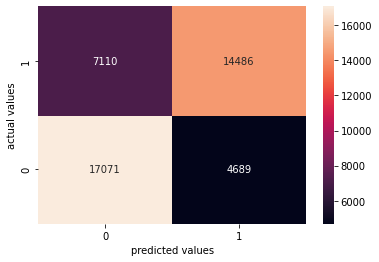

Test confusion matrix


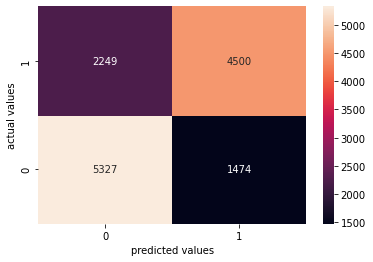

TestAccuracy =  0.725239852398524
precision =  0.7532641446267158
Sensitivity = 0.6667654467328493
F1_score = 0.7073803348266919


In [39]:
trainpredict = model.predict(train)
testpredict = model.predict(test)


print ("Train confusion matrix ")
trainaccuracy = accuracy_score(outputtrain,trainpredict)
print("train Accuracy",trainaccuracy)

ax = sns.heatmap(confusion_matrix(outputtrain,trainpredict),annot=True,fmt='d')
ax.set_ylim([0,2])
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()


print("Test confusion matrix")

bx=sns.heatmap(confusion_matrix(outputtest, testpredict),annot=True,fmt='d')
bx.set_ylim([0,2])

plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

testaccuracy= accuracy_score(outputtest, testpredict)
print("TestAccuracy = ",testaccuracy)
testprecision = precision_score(outputtest,testpredict)
print("precision = ",testprecision)
sensitivity = recall_score(outputtest,testpredict)
print("Sensitivity =",sensitivity)
f1_measure = f1_score(outputtest,testpredict)
print("F1_score =",f1_measure)







***Support Vector Machine*** 

In [40]:
from sklearn.svm import SVC
classifier = SVC()

classifier.fit(train,outputtrain)



Train confusion matrix 
train Accuracy 0.731478918719439


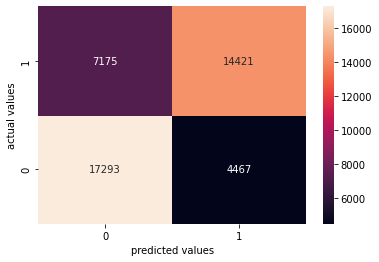

Test confusion matrix


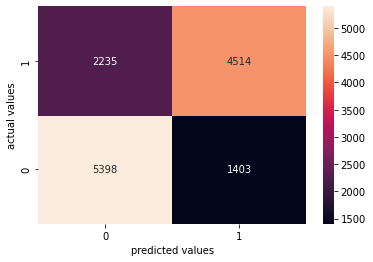

TestAccuracy =  0.7315129151291513
precision =  0.7628865979381443
Sensitivity = 0.6688398281226848
F1_score = 0.7127743565450814


In [41]:
trainpredict2 = classifier.predict(train)

testpredict2 = classifier.predict(test)

print ("Train confusion matrix ")
trainaccuracy2 = accuracy_score(outputtrain,trainpredict2)
print("train Accuracy",trainaccuracy2)

ax = sns.heatmap(confusion_matrix(outputtrain,trainpredict2),annot=True,fmt='d')
ax.set_ylim([0,2])
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()



print("Test confusion matrix")

bx=sns.heatmap(confusion_matrix(outputtest, testpredict2),annot=True,fmt='d')
bx.set_ylim([0,2])

plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

testaccuracy2= accuracy_score(outputtest, testpredict2)
print("TestAccuracy = ",testaccuracy2)
testprecision2 = precision_score(outputtest,testpredict2)
print("precision = ",testprecision2)
sensitivity2 = recall_score(outputtest,testpredict2)
print("Sensitivity =",sensitivity2)
f1_measure2 = f1_score(outputtest,testpredict2)
print("F1_score =",f1_measure2)

**Random Forest**

In [45]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

RFC.fit(train,outputtrain)

RandomForestClassifier()

In [48]:
rfc_train_predict = RFC.predict(train)

rfc_test_predict = RFC.predict(test)

rfc_train_accuracy = accuracy_score(outputtrain,rfc_train_predict)
print("Training Accuracy",rfc_train_accuracy)

rfc_test_accuracy = accuracy_score(outputtest,rfc_test_predict)
print("Test Accuracy",rfc_test_accuracy)


Training Accuracy 0.999792416274564
Test Accuracy 0.7088560885608856


**Decision Tree**

In [52]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()

DTC.fit(train,outputtrain)

DecisionTreeClassifier()

In [54]:
dtc_train_predict = DTC.predict(train)

dtc_test_predict = DTC.predict(test)

dtc_train_accuracy = accuracy_score(outputtrain,dtc_train_predict)
print("Train accuracy", dtc_train_accuracy)
dtc_test_accuracy = accuracy_score(outputtest,dtc_test_predict)
print("Test Accuracy",dtc_test_accuracy)


Train accuracy 0.9998385459913276
Test Accuracy 0.6318819188191882
